In [1]:
import sys
sys.path.append('../')

In [2]:
from scripts.utils import data_path, set_mpl
from scripts.cross_match_scripts import fits_to_pandas, pandas_to_fits, decode_str_columns
import pandas as pd
import numpy as np
import seaborn as sns
from astropy.coordinates import SkyCoord
import astropy.coordinates 
import astropy.units as u

%matplotlib inline

## load DESI matches to eROSITA

In [3]:
desi = pd.read_pickle(data_path+'ERO_lhpv_03_23_sd01_a15_g14_desi_nway_match.gz_pkl', compression='gzip')
desi.reset_index(drop=True, inplace=True)
#desi_cat[['desi_ra', 'desi_dec']].to_csv(data_path+'tmp_desi_cat_ra_dec.csv', index=False, header = False, sep=' ')
pandas_to_fits(desi[['nway_desi_id','desi_ra', 'desi_dec']], filename='ero_nway_desi_cat.fits', table_header_name = 'nway_desi_cat', sky_area_deg2=0)
desi.head(10)

,srcname_fin,RA_fin,DEC_fin,GLON,GLAT,pos_r98,DET_LIKE_0,ML_FLUX_0,ML_FLUX_ERR_0,ML_CTS_0,ML_CTS_ERR_0,ML_EXP_1,EXT,EXT_LIKE,EXT_ERR,ID_SRC,ID_CLUSTER,RA,DEC,RADEC_ERR,DIST_NN,SRCDENS,TSTART,TSTOP,EXT_LOWERR,EXT_UPERR,ML_RATE_0,ML_RATE_ERR_0,ML_BKG_0,RA_corr,DEC_corr,g_id,g_d2d,g_nsrc,g_s,g_gmag,g_maxLx,g_b,s_id,s_z,s_otype,s_d2d,s_nsrc,flag_xray,flag_radio,flag_agn_wise,w1,w2,w3,w1snr,w2snr,w3snr,w_nsrc,sdss_nsrc,sdss_p,sdss_id,sdss_sp,sdss_d2d,hpidx,RADEC_ERR_fin,pos_sigma_2d,pos_r68,pos_r95,ELON,ELAT,flux_05-20,NH,nway_desi_id,nway_Separation_EROSITA_DESI,nway_prob_has_match,nway_prob_this_match,nway_nnmag_grzw1w2w3w4,nway_nnmag_grzw1w2,nway_nnmag_grz,nway_n_match_flag_0,nway_n_match_flag_2,nway_is_duplicated,nway_is_confused,desi_release,desi_objid,desi_brickid,desi_ra,desi_dec,desi_flux_g,desi_flux_r,desi_flux_z,desi_flux_w1,desi_flux_w2,desi_flux_w3,desi_flux_w4,desi_flux_ivar_g,desi_flux_ivar_r,desi_flux_ivar_z,desi_flux_ivar_w1,desi_flux_ivar_w2,desi_flux_ivar_w3,desi_flux_ivar_w4,desi_dered_mag_g,desi_dered_mag_r,desi_dered_mag_z,desi_dered_mag_w1,desi_dered_mag_w2,desi_dered_mag_w3,desi_dered_mag_w4
0,SRGe J101903.3+563020,154.763934,56.505585,154.966043,50.066118,9.267930,15.858959,2.171120e-14,5.650445e-15,28.800014,7.495345,1211.871216,0.0,0.0,0.0,6207,5146,154.765943,56.504295,4.058504,102.778427,0.000023,6.268413e+08,6.270701e+08,0.0,0.0,0.023765,0.006185,7.077317,154.763934,56.505585,853324209744036352,7.576342,1,0,20.950485,-1.0,0,SDSS J101902.92+563016.4,0.949746,QSO,7.576898,1,0,0,2,16.915001,16.554001,12.382,12.1,5.0,0.7,2,1,1,1237658303814435106,9216733310671409152,7.544174,68469189470,4.058504,3.313348,5.001804,8.110237,132.352465,42.185604,1.670761e-14,1.526396e+20,9011_606779_231,5.167984,0.983660,0.983020,-99.000000,0.973052,0.887623,14,0,False,False,9011,231,606779,154.762154,56.504538,3.362170,4.618722,5.989522,16.031805,20.984790,50.180990,-3.493270,435.342250,248.158630,104.400180,3.761635,0.939089,0.001432,0.000018,21.087423,20.774010,20.520338,19.482046,19.191862,18.247932,NaN
1,SRGe J101903.4+563325,154.764302,56.556994,154.897407,50.039645,12.232697,16.660557,2.758328e-14,6.850312e-15,34.209091,8.495835,1133.034668,0.0,0.0,0.0,4806,3902,154.766311,56.555705,5.407337,163.025894,0.000029,6.268413e+08,6.270701e+08,0.0,0.0,0.030192,0.007498,6.562579,154.764302,56.556994,-1,-1.000000,0,-1,NaN,-1.0,-1,SDSS J101904.67+563333.2,1.464000,QSO,13.943999,1,0,0,-1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,-1,0,0,NaN,68265812198,5.407337,4.373272,6.601858,10.704663,132.318989,42.230639,2.122641e-14,1.507868e+20,9011_606779_284,12.929691,0.606908,0.872974,0.961661,0.975168,0.823176,9,0,False,False,9011,284,606779,154.769507,56.559155,4.110681,6.741001,7.775545,18.952187,29.332830,65.296720,371.384800,259.819270,99.752320,72.978060,3.654050,0.866400,0.001278,0.000015,20.872555,20.365770,20.238258,19.300547,18.828358,17.962076,16.075178
2,SRGe J101911.0+562639,154.795822,56.444182,155.033709,50.112976,7.855049,18.953989,1.654359e-14,3.709296e-15,40.391277,9.056271,2230.516357,0.0,0.0,0.0,4530,3655,154.797830,56.442893,3.409649,142.069946,0.000015,6.268413e+08,6.270701e+08,0.0,0.0,0.018108,0.004060,12.856621,154.795822,56.444182,-1,-1.000000,0,-1,NaN,-1.0,-1,NaN,NaN,NaN,-1.000000,0,0,0,-1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,-1,0,0,NaN,68713641563,3.409649,2.808233,4.239287,6.873844,132.413453,42.140474,1.273093e-14,1.537238e+20,9011_606779_455,15.145586,0.000003,0.900838,-99.000000,0.103009,0.213531,7,0,False,False,9011,455,606779,154.798428,56.448135,0.261824,0.279961,0.433191,0.675604,1.692767,-50.740715,326.340500,409.680970,145.013170,117.516495,4.582493,1.061522,0.001434,0.000018,23.850270,23.811726,23.368849,22.919775,21.924826,NaN,16.215527
3,SRGe J101914.3+563109,154.809447,56.519165,154.927665,50.080552,18.357738,9.770685,1.461044e-14,4.307066e-15,28.471239,8.393143,1780.289429,0.0,0.0,0.0,7154,6033,154.811456,56.517875,8.171203,102.778427,0.000021,6.268413e+08,6.270701e+08,0.0,0.0,0.015992,0.004714,10.505683,154.809447,56.5

## load and cross-match SDSS DR16 Quasars

In [4]:
#sdds_dr16_q = fits_to_pandas('SDSS_DR16Q_v4.fits')
#desi_cat[['RA_fin', 'DEC_fin']].describe().loc[['min', 'max']] #fv 154.76<RA<167.09 && 54.12<DEC<61.24
#sdss_q = sdds_dr16_q.query('RA>154.76 & RA<167.09 & DEC>54.12 & DEC<61.24')
#sdss_q.to_pickle(data_path+'SDSS_DR16Q_v4_LH.pkl')
sdss_q = pd.read_pickle(data_path+'SDSS_DR16Q_v4_LH.pkl')
sdss_q.reset_index(drop=True, inplace=True)
sdss_q = decode_str_columns(sdss_q)
sdss_q = sdss_q.add_prefix('SDSSQ_')
sdss_q.head(10)


,SDSSQ_CATALOG,SDSSQ_SDSS_NAME,SDSSQ_RA,SDSSQ_DEC,SDSSQ_PLATE,SDSSQ_MJD,SDSSQ_FIBERID,SDSSQ_AUTOCLASS_PQN,SDSSQ_AUTOCLASS_DR14Q,SDSSQ_IS_QSO_QN,SDSSQ_Z_QN,SDSSQ_RANDOM_SELECT,SDSSQ_Z_10K,SDSSQ_Z_CONF_10K,SDSSQ_PIPE_CORR_10K,SDSSQ_IS_QSO_10K,SDSSQ_THING_ID,SDSSQ_Z_VI,SDSSQ_Z_CONF,SDSSQ_CLASS_PERSON,SDSSQ_Z_DR12Q,SDSSQ_IS_QSO_DR12Q,SDSSQ_Z_DR7Q_SCH,SDSSQ_IS_QSO_DR7Q,SDSSQ_Z_DR6Q_HW,SDSSQ_Z_DR7Q_HW,SDSSQ_IS_QSO_FINAL,SDSSQ_Z,SDSSQ_SOURCE_Z,SDSSQ_Z_PIPE,SDSSQ_ZWARNING,SDSSQ_OBJID,SDSSQ_Z_PCA,SDSSQ_ZWARN_PCA,SDSSQ_DELTACHI2_PCA,SDSSQ_Z_HALPHA,SDSSQ_ZWARN_HALPHA,SDSSQ_DELTACHI2_HALPHA,SDSSQ_Z_HBETA,SDSSQ_ZWARN_HBETA,SDSSQ_DELTACHI2_HBETA,SDSSQ_Z_MGII,SDSSQ_ZWARN_MGII,SDSSQ_DELTACHI2_MGII,SDSSQ_Z_CIII,SDSSQ_ZWARN_CIII,SDSSQ_DELTACHI2_CIII,SDSSQ_Z_CIV,SDSSQ_ZWARN_CIV,SDSSQ_DELTACHI2_CIV,SDSSQ_Z_LYA,SDSSQ_ZWARN_LYA,SDSSQ_DELTACHI2_LYA,SDSSQ_Z_LYAWG,SDSSQ_BAL_PROB,SDSSQ_BI_CIV,SDSSQ_ERR_BI_CIV,SDSSQ_AI_CIV,SDSSQ_ERR_AI_CIV,SDSSQ_BI_SIIV,SDSSQ_ERR_BI_SIIV,SDSSQ_AI_SIIV,SDSSQ_ERR_AI_SIIV,SDSSQ_BOSS_TARGET1,SDSSQ_EBOSS_TARGET0,SDSSQ_EBOSS_TARGET1,SDSSQ_EBOSS_TARGET2,SDSSQ_ANCILLARY_TARGET1,SDSSQ_ANCILLARY_TARGET2,SDSSQ_NSPEC_SDSS,SDSSQ_NSPEC_BOSS,SDSSQ_NSPEC,SDSSQ_SKYVERSION,SDSSQ_RUN_NUMBER,SDSSQ_RERUN_NUMBER,SDSSQ_CAMCOL_NUMBER,SDSSQ_FIELD_NUMBER,SDSSQ_ID_NUMBER,SDSSQ_LAMBDA_EFF,SDSSQ_ZOFFSET,SDSSQ_XFOCAL,SDSSQ_YFOCAL,SDSSQ_CHUNK,SDSSQ_TILE,SDSSQ_PLATESN2,SDSSQ_M_I,SDSSQ_SN_MEDIAN_ALL,SDSSQ_GALEX_MATCHED,SDSSQ_FUV,SDSSQ_FUV_IVAR,SDSSQ_NUV,SDSSQ_NUV_IVAR,SDSSQ_UKIDSS_MATCHED,SDSSQ_YFLUX,SDSSQ_YFLUX_ERR,SDSSQ_JFLUX,SDSSQ_JFLUX_ERR,SDSSQ_HFLUX,SDSSQ_HFLUX_ERR,SDSSQ_KFLUX,SDSSQ_KFLUX_ERR,SDSSQ_W1_FLUX,SDSSQ_W1_FLUX_IVAR,SDSSQ_W1_MAG,SDSSQ_W1_MAG_ERR,SDSSQ_W1_CHI2,SDSSQ_W1_FLUX_SNR,SDSSQ_W1_SRC_FRAC,SDSSQ_W1_EXT_FLUX,SDSSQ_W1_EXT_FRAC,SDSSQ_W1_NPIX,SDSSQ_W2_FLUX,SDSSQ_W2_FLUX_IVAR,SDSSQ_W2_MAG,SDSSQ_W2_MAG_ERR,SDSSQ_W2_CHI2,SDSSQ_W2_FLUX_SNR,SDSSQ_W2_SRC_FRAC,SDSSQ_W2_EXT_FLUX,SDSSQ_W2_EXT_FRAC,SDSSQ_W2_NPIX,SDSSQ_FIRST_MATCHED,SDSSQ_FIRST_FLUX,SDSSQ_FIRST_SNR,SDSSQ_SDSS2FIRST_SEP,SDSSQ_JMAG,SDSSQ_JMAG_ERR,SDSSQ_JSNR,SDSSQ_JRDFLAG,SDSSQ_HMAG,SDSSQ_HMAG_ERR,SDSSQ_HSNR,SDSSQ_HRDFLAG,SDSSQ_KMAG,SDSSQ_KMAG_ERR,SDSSQ_KSNR,SDSSQ_KRDFLAG,SDSSQ_SDSS2MASS_SEP,SDSSQ_2RXS_ID,SDSSQ_2RXS_RA,SDSSQ_2RXS_DEC,SDSSQ_2RXS_SRC_FLUX,SDSSQ_2RXS_SRC_FLUX_ERR,SDSSQ_SDSS2ROSAT_SEP,SDSSQ_XMM_SRC_ID,SDSSQ_XMM_RA,SDSSQ_XMM_DEC,SDSSQ_XMM_SOFT_FLUX,SDSSQ_XMM_SOFT_FLUX_ERR,SDSSQ_XMM_HARD_FLUX,SDSSQ_XMM_HARD_FLUX_ERR,SDSSQ_XMM_TOTAL_FLUX,SDSSQ_XMM_TOTAL_FLUX_ERR,SDSSQ_XMM_TOTAL_LUM,SDSSQ_SDSS2XMM_SEP,SDSSQ_GAIA_MATCHED,SDSSQ_GAIA_DESIGNATION,SDSSQ_GAIA_RA,SDSSQ_GAIA_DEC,SDSSQ_GAIA_PARALLAX,SDSSQ_GAIA_PARALLAX_ERR,SDSSQ_GAIA_PM_RA,SDSSQ_GAIA_PM_RA_ERR,SDSSQ_GAIA_PM_DEC,SDSSQ_GAIA_PM_DEC_ERR,SDSSQ_GAIA_G_MAG,SDSSQ_GAIA_G_FLUX_SNR,SDSSQ_GAIA_BP_MAG,SDSSQ_GAIA_BP_FLUX_SNR,SDSSQ_GAIA_RP_MAG,SDSSQ_GAIA_RP_FLUX_SNR,SDSSQ_SDSS2GAIA_SEP
0,297381,101902.92+563016.4,154.762176,56.504558,8186,57452,424,QSO,QSO,1,0.948912,0,-1.0,-1,-1,-1,514041046,-1.000,0,0,-1.000000,0,-1.0,-1,-1.0,-1.0,1,0.949672,PIPE,0.949672,0,1237658303814435106,0.949640,0,1566.986292,-1.0,7682,0.0,0.944766,0,41.486968,0.949606,0,217.798986,0.926423,0,37.568488,-1.000000,7682,0.000000,-1.000000,7682,0.000000,0.949639,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.000000,-1.000000,0,0,1024,0,0,0,0,1,1,2,2987,301,4,44,290,5400.0,0.0,-212.864288,-131.953308,eboss4,16647,15.197300,-23.173157,2.828909,1,-0.264620,1.631389,1.045455,8.026475,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,129.829941,0.006160,17.216562,0.106555,0.702705,10.189486,0.845354,1.708352,0.013158,36,331.018524,0.000470,16.200369,0.151259,0.734183,7.177998,0.852047,1.223960e+00,0.003698,36,0,-1.00,-1.000000,-1.00000,-1.0,-1.0,-1.0,-1,-1.0,-1.0,-1.0,-1,-1.0,-1.0,-1.0,-1,-1.0,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1,-1.000000,-1.000000,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.0,-1.00000,0,-1,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000

In [5]:
coords_sdss = SkyCoord(ra=sdss_q['SDSSQ_RA']*u.degree, dec=sdss_q['SDSSQ_DEC']*u.degree, frame='icrs')    
coords_desi = SkyCoord(ra=desi['desi_ra']*u.degree, dec=desi['desi_dec']*u.degree, frame='icrs') 
cross_sdss_desi = astropy.coordinates.search_around_sky(coords_desi, coords_sdss, 3*u.arcsec) 
id_desi, id_sdss, ang_sep = cross_sdss_desi[0], cross_sdss_desi[1], cross_sdss_desi[2]

ang_sep = ang_sep.to(u.arcsec)
ang_sep = pd.DataFrame({'Separation_DESI_SDSS': ang_sep})

df1 = desi.loc[id_desi]
df1.reset_index(drop=True, inplace=True)
df2 = sdss_q.loc[id_sdss]
df2.reset_index(drop=True, inplace=True)
desi_sdss = pd.concat([df1,ang_sep, df2], axis=1) 
#desi_sdss_match = desi_sdss_match.query("nway_prob_has_match>0.4")
desi_sdss['is_qso'] = True
desi_sdss


/var/folders/hk/rctb6p8n16nbrbnjrwzrc8680000gp/T/ipykernel_69425/2624990566.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  desi_sdss['is_qso'] = True


,srcname_fin,RA_fin,DEC_fin,GLON,GLAT,pos_r98,DET_LIKE_0,ML_FLUX_0,ML_FLUX_ERR_0,ML_CTS_0,ML_CTS_ERR_0,ML_EXP_1,EXT,EXT_LIKE,EXT_ERR,ID_SRC,ID_CLUSTER,RA,DEC,RADEC_ERR,DIST_NN,SRCDENS,TSTART,TSTOP,EXT_LOWERR,EXT_UPERR,ML_RATE_0,ML_RATE_ERR_0,ML_BKG_0,RA_corr,DEC_corr,g_id,g_d2d,g_nsrc,g_s,g_gmag,g_maxLx,g_b,s_id,s_z,s_otype,s_d2d,s_nsrc,flag_xray,flag_radio,flag_agn_wise,w1,w2,w3,w1snr,w2snr,w3snr,w_nsrc,sdss_nsrc,sdss_p,sdss_id,sdss_sp,sdss_d2d,hpidx,RADEC_ERR_fin,pos_sigma_2d,pos_r68,pos_r95,ELON,ELAT,flux_05-20,NH,nway_desi_id,nway_Separation_EROSITA_DESI,nway_prob_has_match,nway_prob_this_match,nway_nnmag_grzw1w2w3w4,nway_nnmag_grzw1w2,nway_nnmag_grz,nway_n_match_flag_0,nway_n_match_flag_2,nway_is_duplicated,nway_is_confused,desi_release,desi_objid,desi_brickid,desi_ra,desi_dec,desi_flux_g,desi_flux_r,desi_flux_z,desi_flux_w1,desi_flux_w2,desi_flux_w3,desi_flux_w4,desi_flux_ivar_g,desi_flux_ivar_r,desi_flux_ivar_z,desi_flux_ivar_w1,desi_flux_ivar_w2,desi_flux_ivar_w3,desi_flux_ivar_w4,desi_dered_mag_g,desi_dered_mag_r,desi_dered_mag_z,desi_dered_mag_w1,desi_dered_mag_w2,desi_dered_mag_w3,desi_dered_mag_w4,Separation_DESI_SDSS,SDSSQ_CATALOG,SDSSQ_SDSS_NAME,SDSSQ_RA,SDSSQ_DEC,SDSSQ_PLATE,SDSSQ_MJD,SDSSQ_FIBERID,SDSSQ_AUTOCLASS_PQN,SDSSQ_AUTOCLASS_DR14Q,SDSSQ_IS_QSO_QN,SDSSQ_Z_QN,SDSSQ_RANDOM_SELECT,SDSSQ_Z_10K,SDSSQ_Z_CONF_10K,SDSSQ_PIPE_CORR_10K,SDSSQ_IS_QSO_10K,SDSSQ_THING_ID,SDSSQ_Z_VI,SDSSQ_Z_CONF,SDSSQ_CLASS_PERSON,SDSSQ_Z_DR12Q,SDSSQ_IS_QSO_DR12Q,SDSSQ_Z_DR7Q_SCH,SDSSQ_IS_QSO_DR7Q,SDSSQ_Z_DR6Q_HW,SDSSQ_Z_DR7Q_HW,SDSSQ_IS_QSO_FINAL,SDSSQ_Z,SDSSQ_SOURCE_Z,SDSSQ_Z_PIPE,SDSSQ_ZWARNING,SDSSQ_OBJID,SDSSQ_Z_PCA,SDSSQ_ZWARN_PCA,SDSSQ_DELTACHI2_PCA,SDSSQ_Z_HALPHA,SDSSQ_ZWARN_HALPHA,SDSSQ_DELTACHI2_HALPHA,SDSSQ_Z_HBETA,SDSSQ_ZWARN_HBETA,SDSSQ_DELTACHI2_HBETA,SDSSQ_Z_MGII,SDSSQ_ZWARN_MGII,SDSSQ_DELTACHI2_MGII,SDSSQ_Z_CIII,SDSSQ_ZWARN_CIII,SDSSQ_DELTACHI2_CIII,SDSSQ_Z_CIV,SDSSQ_ZWARN_CIV,SDSSQ_DELTACHI2_CIV,SDSSQ_Z_LYA,SDSSQ_ZWARN_LYA,SDSSQ_DELTACHI2_LYA,SDSSQ_Z_LYAWG,SDSSQ_BAL_PROB,SDSSQ_BI_CIV,SDSSQ_ERR_BI_CIV,SDSSQ_AI_CIV,SDSSQ_ERR_AI_CIV,SDSSQ_BI_SIIV,SDSSQ_ERR_BI_SIIV,SDSSQ_AI_SIIV,SDSSQ_ERR_AI_SIIV,SDSSQ_BOSS_TARGET1,SDSSQ_EBOSS_TARGET0,SDSSQ_EBOSS_TARGET1,SDSSQ_EBOSS_TARGET2,SDSSQ_ANCILLARY_TARGET1,SDSSQ_ANCILLARY_TARGET2,SDSSQ_NSPEC_SDSS,SDSSQ_NSPEC_BOSS,SDSSQ_NSPEC,SDSSQ_SKYVERSION,SDSSQ_RUN_NUMBER,SDSSQ_RERUN_NUMBER,SDSSQ_CAMCOL_NUMBER,SDSSQ_FIELD_NUMBER,SDSSQ_ID_NUMBER,SDSSQ_LAMBDA_EFF,SDSSQ_ZOFFSET,SDSSQ_XFOCAL,SDSSQ_YFOCAL,SDSSQ_CHUNK,SDSSQ_TILE,SDSSQ_PLATESN2,SDSSQ_M_I,SDSSQ_SN_MEDIAN_ALL,SDSSQ_GALEX_MATCHED,SDSSQ_FUV,SDSSQ_FUV_IVAR,SDSSQ_NUV,SDSSQ_NUV_IVAR,SDSSQ_UKIDSS_MATCHED,SDSSQ_YFLUX,SDSSQ_YFLUX_ERR,SDSSQ_JFLUX,SDSSQ_JFLUX_ERR,SDSSQ_HFLUX,SDSSQ_HFLUX_ERR,SDSSQ_KFLUX,SDSSQ_KFLUX_ERR,SDSSQ_W1_FLUX,SDSSQ_W1_FLUX_IVAR,SDSSQ_W1_MAG,SDSSQ_W1_MAG_ERR,SDSSQ_W1_CHI2,SDSSQ_W1_FLUX_SNR,SDSSQ_W1_SRC_FRAC,SDSSQ_W1_EXT_FLUX,SDSSQ_W1_EXT_FRAC,SDSSQ_W1_NPIX,SDSSQ_W2_FLUX,SDSSQ_W2_FLUX_IVAR,SDSSQ_W2_MAG,SDSSQ_W2_MAG_ERR,SDSSQ_W2_CHI2,SDSSQ_W2_FLUX_SNR,SDSSQ_W2_SRC_FRAC,SDSSQ_W2_EXT_FLUX,SDSSQ_W2_EXT_FRAC,SDSSQ_W2_NPIX,SDSSQ_FIRST_MATCHED,SDSSQ_FIRST_FLUX,SDSSQ_FIRST_SNR,SDSSQ_SDSS2FIRST_SEP,SDSSQ_JMAG,SDSSQ_JMAG_ERR,SDSSQ_JSNR,SDSSQ_JRDFLAG,SDSSQ_HMAG,SDSSQ_HMAG_ERR,SDSSQ_HSNR,SDSSQ_HRDFLAG,SDSSQ_KMAG,SDSSQ_KMAG_ERR,SDSSQ_KSNR,SDSSQ_KRDFLAG,SDSSQ_SDSS2MASS_SEP,SDSSQ_2RXS_ID,SDSSQ_2RXS_RA,SDSSQ_2RXS_DEC,SDSSQ_2RXS_SRC_FLUX,SDSSQ_2RXS_SRC_FLUX_ERR,SDSSQ_SDSS2ROSAT_SEP,SDSSQ_XMM_SRC_ID,SDSSQ_XMM_RA,SDSSQ_XMM_DEC,SDSSQ_XMM_SOFT_FLUX,SDSSQ_XMM_SOFT_FLUX_ERR,SDSSQ_XMM_HARD_FLUX,SDSSQ_XMM_HARD_FLUX_ERR,SDSSQ_XMM_TOTAL_FLUX,SDSSQ_XMM_TOTAL_FLUX_ERR,SDSSQ_XMM_TOTAL_LUM,SDSSQ_SDSS2XMM_SEP,SDSSQ_GAIA_MATCHED,SDSSQ_GAIA_DESIGNATION,SDSSQ_GAIA_RA,SDSSQ_GAIA_DEC,SDSSQ_GAIA_PARALLAX,SDSSQ_GAIA_PARALLAX_ERR,SDSSQ_GAIA_PM_RA,SDSSQ_GAIA_PM_RA_ERR,SDSSQ_GAIA_PM_DEC,SDSSQ_GAIA_PM_DEC_ERR,SDSSQ_GAIA_G_MAG,SDSSQ_GAIA_G_FLUX_SNR,SDSSQ_GAIA_BP_MAG,SDSSQ_GAIA_BP_FLUX_SNR,SDSSQ_GAIA_RP_MAG,SDSSQ_GAIA_RP_FLUX_SNR,SDSSQ_SDSS2GAIA_SEP,is_qso
0,SRGe J101903

# load GAIA eDR3 cross-match results

MB helped me with this


In [6]:
gaia = fits_to_pandas('nway_desi_gaia.fits')
gaia = decode_str_columns(gaia)
gaia.nway_desi_id = gaia.nway_desi_id.str.replace(' ', '')
gaia.drop_duplicates(subset = ['nway_desi_id', 'designation'], inplace=True, keep='first') #drop duplicated rows, since in desi_cat there are duplicated desi_id (i.e. two sources have the same desi_id)

gaia = gaia.sort_values(by=['nway_desi_id', 'sep'], ascending=True) #for each desi_id, sort by sep ascending
gaia = gaia.drop_duplicates(subset = ['nway_desi_id'], keep='first') #keep only the first row for each desi_id, i.e. the closest
gaia = gaia.add_prefix('GAIA_')
gaia.reset_index(drop=True, inplace=True)
gaia.rename(columns={'GAIA_nway_desi_id': 'nway_desi_id'}, inplace=True)

gaia

,GAIA_,nway_desi_id,GAIA_desi_ra,GAIA_desi_dec,GAIA_sep,GAIA_designation,GAIA_source_id,GAIA_ra,GAIA_ra_error,GAIA_dec,GAIA_dec_error,GAIA_parallax,GAIA_parallax_error,GAIA_pm,GAIA_pmra,GAIA_pmra_error,GAIA_pmdec,GAIA_pmdec_error,GAIA_astrometric_n_good_obs_al,GAIA_astrometric_gof_al,GAIA_astrometric_chi2_al,GAIA_astrometric_excess_noise,GAIA_astrometric_excess_noise_sig,GAIA_pseudocolour,GAIA_pseudocolour_error,GAIA_visibility_periods_used,GAIA_ruwe,GAIA_duplicated_source,GAIA_phot_g_n_obs,GAIA_phot_g_mean_flux,GAIA_phot_g_mean_flux_error,GAIA_phot_g_mean_mag,GAIA_phot_bp_mean_flux,GAIA_phot_bp_mean_flux_error,GAIA_phot_bp_mean_mag,GAIA_phot_rp_mean_flux,GAIA_phot_rp_mean_flux_error,GAIA_phot_rp_mean_mag,GAIA_dr2_radial_velocity,GAIA_dr2_radial_velocity_error,GAIA_l,GAIA_b,GAIA_ecl_lon,GAIA_ecl_lat
0,2554,9011_598549_854,161.461856,54.123404,0.000429,Gaia EDR3 849848168159792896,849848168159792896,161.461856,0.158014,54.123404,0.175890,0.367306,0.235049,0.536021,0.520721,0.213223,0.127153,0.225809,468,0.240291,494.55255,0.071555,0.012738,NaN,NaN,24,1.007185,False,483,310.747537,1.397241,19.456348,178.595336,11.378171,19.708866,207.201215,8.378896,18.956915,NaN,NaN,154.699345,54.555012,138.403143,42.013311
1,2266,9011_599395_347,160.838825,54.165516,0.000508,Gaia EDR3 850233516918641536,850233516918641536,160.838825,0.295284,54.165516,0.415622,-0.054113,0.515165,1.077619,0.343215,0.416674,1.021502,0.564833,410,4.562058,569.54500,2.080065,3.785090,1.587700,0.100101,23,1.163844,False,396,214.417338,2.141522,19.859217,229.294127,9.292883,19.437560,345.955810,11.866353,18.400345,NaN,NaN,155.014390,54.236717,137.951353,41.864949
2,2276,9011_599395_499,160.853456,54.274962,0.000109,Gaia EDR3 850243648745453568,850243648745453568,160.853456,0.086079,54.274962,0.118870,-0.092982,0.142351,0.072722,-0.006605,0.125516,0.072421,0.144025,445,-0.960320,430.46360,0.000000,0.000000,NaN,NaN,24,0.967054,False,435,797.351636,1.964222,18.433243,551.718422,16.715310,18.484250,412.699870,10.459343,18.208809,NaN,NaN,154.854782,54.178940,137.887009,41.963737
3,2294,9011_599395_952,160.899655,54.269643,0.002691,Gaia EDR3 850240728167689472,850240728167689472,160.899654,0.396818,54.269643,0.585180,0.327370,0.668783,2.787927,-0.852183,0.596271,-2.654491,0.845765,330,1.575606,399.57642,0.673315,0.188233,NaN,NaN,20,1.061386,False,323,122.246948,0.801675,20.469273,74.695043,5.839685,20.655313,87.909383,8.424993,19.887808,NaN,NaN,154.834797,54.203826,137.921931,41.972783
4,2539,9011_599396_2176,161.434078,54.186100,0.000997,Gaia EDR3 849849340683585152,849849340683585152,161.434078,0.394121,54.186100,0.510943,-0.494586,0.605882,0.742323,0.054289,0.546157,-0.740335,0.701758,331,-1.117676,325.48172,0.000000,0.000000,NaN,NaN,20,0.955542,False,347,116.968147,0.680231,20.517199,86.597004,7.207419,20.494785,85.292673,8.356878,19.920616,NaN,NaN,154.629825,54.504337,138.341415,42.059065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3108,841,9011_621004_2290,159.636688,61.160669,0.001907,Gaia EDR3 1048162648053126016,1048162648053126016,159.636689,0.906508,61.160669,1.044926,0.038121,0.728376,1.412873,-0.906031,0.965669,-1.084121,1.141229,264,1.202240,297.18777,1.116946,0.479423,1.646997,0.179470,20,1.052075,False,262,114.925054,2.365737,20.536330,69.583088,4.343144,20.732283,99.150687,8.038062,19.757156,NaN,NaN,146.859345,49.336712,131.988199,47.470289
3109,897,9011_621005_2555,160.182338,61.131444,0.011980,Gaia EDR3 1048153547017843840,1048153547017843840,160.182336,0.013054,61.131447,0.015288,2.589347,0.020562,24.037333,-4.993437,0.017969,23.512952,0.023532,524,0.849681,554.13135,0.000000,0.000000,NaN,NaN,29,1.025841,False,500,21377.249006,56.014942,14.862488,8540.101787,97.734726,15.509885,19051.363587,133.040120,14.048080,NaN,NaN,146.622431,49.552263,132.337003,47.591636
3110,869,9011_621005_665,159.919707,61.235864,0.000120,Gaia

In [7]:
desi_gaia = desi.merge(gaia, on=['nway_desi_id'], how='right')
desi_gaia = desi_gaia.query("GAIA_designation.notna()")
desi_gaia

,srcname_fin,RA_fin,DEC_fin,GLON,GLAT,pos_r98,DET_LIKE_0,ML_FLUX_0,ML_FLUX_ERR_0,ML_CTS_0,ML_CTS_ERR_0,ML_EXP_1,EXT,EXT_LIKE,EXT_ERR,ID_SRC,ID_CLUSTER,RA,DEC,RADEC_ERR,DIST_NN,SRCDENS,TSTART,TSTOP,EXT_LOWERR,EXT_UPERR,ML_RATE_0,ML_RATE_ERR_0,ML_BKG_0,RA_corr,DEC_corr,g_id,g_d2d,g_nsrc,g_s,g_gmag,g_maxLx,g_b,s_id,s_z,s_otype,s_d2d,s_nsrc,flag_xray,flag_radio,flag_agn_wise,w1,w2,w3,w1snr,w2snr,w3snr,w_nsrc,sdss_nsrc,sdss_p,sdss_id,sdss_sp,sdss_d2d,hpidx,RADEC_ERR_fin,pos_sigma_2d,pos_r68,pos_r95,ELON,ELAT,flux_05-20,NH,nway_desi_id,nway_Separation_EROSITA_DESI,nway_prob_has_match,nway_prob_this_match,nway_nnmag_grzw1w2w3w4,nway_nnmag_grzw1w2,nway_nnmag_grz,nway_n_match_flag_0,nway_n_match_flag_2,nway_is_duplicated,nway_is_confused,desi_release,desi_objid,desi_brickid,desi_ra,desi_dec,desi_flux_g,desi_flux_r,desi_flux_z,desi_flux_w1,desi_flux_w2,desi_flux_w3,desi_flux_w4,desi_flux_ivar_g,desi_flux_ivar_r,desi_flux_ivar_z,desi_flux_ivar_w1,desi_flux_ivar_w2,desi_flux_ivar_w3,desi_flux_ivar_w4,desi_dered_mag_g,desi_dered_mag_r,desi_dered_mag_z,desi_dered_mag_w1,desi_dered_mag_w2,desi_dered_mag_w3,desi_dered_mag_w4,GAIA_,GAIA_desi_ra,GAIA_desi_dec,GAIA_sep,GAIA_designation,GAIA_source_id,GAIA_ra,GAIA_ra_error,GAIA_dec,GAIA_dec_error,GAIA_parallax,GAIA_parallax_error,GAIA_pm,GAIA_pmra,GAIA_pmra_error,GAIA_pmdec,GAIA_pmdec_error,GAIA_astrometric_n_good_obs_al,GAIA_astrometric_gof_al,GAIA_astrometric_chi2_al,GAIA_astrometric_excess_noise,GAIA_astrometric_excess_noise_sig,GAIA_pseudocolour,GAIA_pseudocolour_error,GAIA_visibility_periods_used,GAIA_ruwe,GAIA_duplicated_source,GAIA_phot_g_n_obs,GAIA_phot_g_mean_flux,GAIA_phot_g_mean_flux_error,GAIA_phot_g_mean_mag,GAIA_phot_bp_mean_flux,GAIA_phot_bp_mean_flux_error,GAIA_phot_bp_mean_mag,GAIA_phot_rp_mean_flux,GAIA_phot_rp_mean_flux_error,GAIA_phot_rp_mean_mag,GAIA_dr2_radial_velocity,GAIA_dr2_radial_velocity_error,GAIA_l,GAIA_b,GAIA_ecl_lon,GAIA_ecl_lat
0,SRGe J104550.6+540727,161.460739,54.124219,154.698900,54.553998,15.467319,19.072407,5.692557e-14,1.461285e-14,33.235191,8.531504,533.381897,0.0,0.0,0.0,6310,5238,161.462747,54.122930,6.869189,234.283157,0.000051,6.268413e+08,6.270701e+08,0.0,0.0,0.062310,0.015995,2.996395,161.460739,54.124219,849848168159792896,2.539266,1,0,19.456348,-1.0,0,[VV2000] J104550.7+540723,1.504404,QSO,2.543987,1,1,0,1,16.483000,15.370,12.366,16.2,12.0,2.6,1,1,1,1237657769639215311,9202249717584777216,2.495981,78220367600,6.869189,5.529672,8.347549,13.535235,138.401809,42.013669,4.380645e-14,1.052232e+20,9011_598549_854,3.764685,0.943377,0.980203,0.958025,0.975869,0.887360,7,0,False,False,9011,854,598549,161.461856,54.123404,11.489907,16.651606,18.840080,22.276308,32.667862,101.578570,147.237920,252.552760,105.950320,78.725510,3.842101,0.937578,0.001179,0.000015,19.807010,19.417934,19.296392,19.127975,18.713215,17.482677,17.079832,2554,161.461856,54.123404,0.000429,Gaia EDR3 849848168159792896,849848168159792896,161.461856,0.158014,54.123404,0.175890,0.367306,0.235049,0.536021,0.520721,0.213223,0.127153,0.225809,468,0.240291,494.55255,0.071555,0.012738,NaN,NaN,24,1.007185,False,483,310.747537,1.397241,19.456348,178.595336,11.378171,19.708866,207.201215,8.378896,18.956915,NaN,NaN,154.699345,54.555012,138.403143,42.013311
1,SRGe J104320.9+540958,160.837061,54.165983,155.014787,54.235608,13.819730,13.469178,6.780014e-14,2.183283e-14,18.830114,6.063627,253.728867,0.0,0.0,0.0,5483,4491,160.839070,54.164693,6.125422,211.585846,0.000046,6.268413e+08,6.270701e+08,0.0,0.0,0.074214,0.023898,1.339501,160.837061,54.165983,850233516918641536,3.005678,1,0,19.859217,-1.0,0,NaN,NaN,NaN,-1.000000,0,0,0,0,14.937000,14.303,11.060,35.2,26.5,10.2,1,1,0,1237657769639084254,0,3.050999,78044851301,6.125422,4.940647,7.458362,12.093453,137.949822,41.864820,5.217485e-14,1.022602e+20,9011_599395_347,4.080374,0.967492,0.990120,0.967687,0.976787,0.902604,17,0,False,False,9011,347,599395,160.838825,54.165516,17.087223,28.204777,44.875404,102.871400,107.557540,327.496000,533.010440,211.359360,

In [8]:
th = 3
star_mask = desi_gaia.eval('(GAIA_parallax/GAIA_parallax_error > @th) | (GAIA_pmra/GAIA_pmra_error > @th) | (GAIA_pmdec/GAIA_pmdec_error > @th)')
desi_gaia.loc[star_mask, 'is_star'] = True
desi_gaia.loc[~star_mask, 'is_star'] = False

# join cross-match results

In [12]:
#merge desi_gaia with desi_sdss with desi to create a new desi_gaia_sdss catalog 
#https://stackoverflow.com/questions/44327999/python-pandas-merge-multiple-dataframes
from functools import reduce
data_frames = [desi, desi_gaia, desi_sdss]

desi_gaia_sdss = reduce(lambda  left,right: pd.merge(left,right,on=list(desi.columns.values),
                                            how='outer'), data_frames).fillna(np.nan)
#assign extragalactic flag: if is_qso is True, then is_extragalactic is True; if is_star is True, then is_extragalactic is False; if not known, then is_extragalactic is NaN
desi_gaia_sdss['source_class'] = 'unknown'
desi_gaia_sdss.loc[desi_gaia_sdss['is_qso']==True, 'source_class'] = 'secure_extragal'
desi_gaia_sdss.loc[desi_gaia_sdss['is_star']==True, 'source_class'] = 'secure_gal'

pd.to_pickle(desi_gaia_sdss, data_path+'desi_gaia_sdss.pkl')


desi_gaia_sdss


,srcname_fin,RA_fin,DEC_fin,GLON,GLAT,pos_r98,DET_LIKE_0,ML_FLUX_0,ML_FLUX_ERR_0,ML_CTS_0,ML_CTS_ERR_0,ML_EXP_1,EXT,EXT_LIKE,EXT_ERR,ID_SRC,ID_CLUSTER,RA,DEC,RADEC_ERR,DIST_NN,SRCDENS,TSTART,TSTOP,EXT_LOWERR,EXT_UPERR,ML_RATE_0,ML_RATE_ERR_0,ML_BKG_0,RA_corr,DEC_corr,g_id,g_d2d,g_nsrc,g_s,g_gmag,g_maxLx,g_b,s_id,s_z,s_otype,s_d2d,s_nsrc,flag_xray,flag_radio,flag_agn_wise,w1,w2,w3,w1snr,w2snr,w3snr,w_nsrc,sdss_nsrc,sdss_p,sdss_id,sdss_sp,sdss_d2d,hpidx,RADEC_ERR_fin,pos_sigma_2d,pos_r68,pos_r95,ELON,ELAT,flux_05-20,NH,nway_desi_id,nway_Separation_EROSITA_DESI,nway_prob_has_match,nway_prob_this_match,nway_nnmag_grzw1w2w3w4,nway_nnmag_grzw1w2,nway_nnmag_grz,nway_n_match_flag_0,nway_n_match_flag_2,nway_is_duplicated,nway_is_confused,desi_release,desi_objid,desi_brickid,desi_ra,desi_dec,desi_flux_g,desi_flux_r,desi_flux_z,desi_flux_w1,desi_flux_w2,desi_flux_w3,desi_flux_w4,desi_flux_ivar_g,desi_flux_ivar_r,desi_flux_ivar_z,desi_flux_ivar_w1,desi_flux_ivar_w2,desi_flux_ivar_w3,desi_flux_ivar_w4,desi_dered_mag_g,desi_dered_mag_r,desi_dered_mag_z,desi_dered_mag_w1,desi_dered_mag_w2,desi_dered_mag_w3,desi_dered_mag_w4,GAIA_,GAIA_desi_ra,GAIA_desi_dec,GAIA_sep,GAIA_designation,GAIA_source_id,GAIA_ra,GAIA_ra_error,GAIA_dec,GAIA_dec_error,GAIA_parallax,GAIA_parallax_error,GAIA_pm,GAIA_pmra,GAIA_pmra_error,GAIA_pmdec,GAIA_pmdec_error,GAIA_astrometric_n_good_obs_al,GAIA_astrometric_gof_al,GAIA_astrometric_chi2_al,GAIA_astrometric_excess_noise,GAIA_astrometric_excess_noise_sig,GAIA_pseudocolour,GAIA_pseudocolour_error,GAIA_visibility_periods_used,GAIA_ruwe,GAIA_duplicated_source,GAIA_phot_g_n_obs,GAIA_phot_g_mean_flux,GAIA_phot_g_mean_flux_error,GAIA_phot_g_mean_mag,GAIA_phot_bp_mean_flux,GAIA_phot_bp_mean_flux_error,GAIA_phot_bp_mean_mag,GAIA_phot_rp_mean_flux,GAIA_phot_rp_mean_flux_error,GAIA_phot_rp_mean_mag,GAIA_dr2_radial_velocity,GAIA_dr2_radial_velocity_error,GAIA_l,GAIA_b,GAIA_ecl_lon,GAIA_ecl_lat,is_star,Separation_DESI_SDSS,SDSSQ_CATALOG,SDSSQ_SDSS_NAME,SDSSQ_RA,SDSSQ_DEC,SDSSQ_PLATE,SDSSQ_MJD,SDSSQ_FIBERID,SDSSQ_AUTOCLASS_PQN,SDSSQ_AUTOCLASS_DR14Q,SDSSQ_IS_QSO_QN,SDSSQ_Z_QN,SDSSQ_RANDOM_SELECT,SDSSQ_Z_10K,SDSSQ_Z_CONF_10K,SDSSQ_PIPE_CORR_10K,SDSSQ_IS_QSO_10K,SDSSQ_THING_ID,SDSSQ_Z_VI,SDSSQ_Z_CONF,SDSSQ_CLASS_PERSON,SDSSQ_Z_DR12Q,SDSSQ_IS_QSO_DR12Q,SDSSQ_Z_DR7Q_SCH,SDSSQ_IS_QSO_DR7Q,SDSSQ_Z_DR6Q_HW,SDSSQ_Z_DR7Q_HW,SDSSQ_IS_QSO_FINAL,SDSSQ_Z,SDSSQ_SOURCE_Z,SDSSQ_Z_PIPE,SDSSQ_ZWARNING,SDSSQ_OBJID,SDSSQ_Z_PCA,SDSSQ_ZWARN_PCA,SDSSQ_DELTACHI2_PCA,SDSSQ_Z_HALPHA,SDSSQ_ZWARN_HALPHA,SDSSQ_DELTACHI2_HALPHA,SDSSQ_Z_HBETA,SDSSQ_ZWARN_HBETA,SDSSQ_DELTACHI2_HBETA,SDSSQ_Z_MGII,SDSSQ_ZWARN_MGII,SDSSQ_DELTACHI2_MGII,SDSSQ_Z_CIII,SDSSQ_ZWARN_CIII,SDSSQ_DELTACHI2_CIII,SDSSQ_Z_CIV,SDSSQ_ZWARN_CIV,SDSSQ_DELTACHI2_CIV,SDSSQ_Z_LYA,SDSSQ_ZWARN_LYA,SDSSQ_DELTACHI2_LYA,SDSSQ_Z_LYAWG,SDSSQ_BAL_PROB,SDSSQ_BI_CIV,SDSSQ_ERR_BI_CIV,SDSSQ_AI_CIV,SDSSQ_ERR_AI_CIV,SDSSQ_BI_SIIV,SDSSQ_ERR_BI_SIIV,SDSSQ_AI_SIIV,SDSSQ_ERR_AI_SIIV,SDSSQ_BOSS_TARGET1,SDSSQ_EBOSS_TARGET0,SDSSQ_EBOSS_TARGET1,SDSSQ_EBOSS_TARGET2,SDSSQ_ANCILLARY_TARGET1,SDSSQ_ANCILLARY_TARGET2,SDSSQ_NSPEC_SDSS,SDSSQ_NSPEC_BOSS,SDSSQ_NSPEC,SDSSQ_SKYVERSION,SDSSQ_RUN_NUMBER,SDSSQ_RERUN_NUMBER,SDSSQ_CAMCOL_NUMBER,SDSSQ_FIELD_NUMBER,SDSSQ_ID_NUMBER,SDSSQ_LAMBDA_EFF,SDSSQ_ZOFFSET,SDSSQ_XFOCAL,SDSSQ_YFOCAL,SDSSQ_CHUNK,SDSSQ_TILE,SDSSQ_PLATESN2,SDSSQ_M_I,SDSSQ_SN_MEDIAN_ALL,SDSSQ_GALEX_MATCHED,SDSSQ_FUV,SDSSQ_FUV_IVAR,SDSSQ_NUV,SDSSQ_NUV_IVAR,SDSSQ_UKIDSS_MATCHED,SDSSQ_YFLUX,SDSSQ_YFLUX_ERR,SDSSQ_JFLUX,SDSSQ_JFLUX_ERR,SDSSQ_HFLUX,SDSSQ_HFLUX_ERR,SDSSQ_KFLUX,SDSSQ_KFLUX_ERR,SDSSQ_W1_FLUX,SDSSQ_W1_FLUX_IVAR,SDSSQ_W1_MAG,SDSSQ_W1_MAG_ERR,SDSSQ_W1_CHI2,SDSSQ_W1_FLUX_SNR,SDSSQ_W1_SRC_FRAC,SDSSQ_W1_EXT_FLUX,SDSSQ_W1_EXT_FRAC,SDSSQ_W1_NPIX,SDSSQ_W2_FLUX,SDSSQ_W2_FLUX_IVAR,SDSSQ_W2_MAG,SDSSQ_W2_MAG_ERR,SDSSQ_W2_CHI2,SDSSQ_W2_FLUX_SNR,SDSSQ_W2_SRC_FRAC,SDSSQ_W2_EXT_FLUX,SDSSQ_W2_EXT_FRAC,SDSSQ_W2_NPIX,SDSSQ_FIRST_MATCHED,SDSSQ_FIRST_FLUX,SDSSQ_FIRST_SNR,SDSSQ_SDSS2FIRST_SEP,SDSSQ_JMAG,SDSSQ_JMAG_ERR,SDSSQ_JSNR,SDSSQ_JRDFL

In [ ]:
print(desi_gais_sdss.source_class.value_counts())


unknown            6915
secure_extragal    2043
secure_gal          542
Name: source_class, dtype: int64


In [ ]:
[x for x in desi_gais_sdss.columns if 'desi' in x]

['nway_desi_id',
 'desi_release',
 'desi_objid',
 'desi_brickid',
 'desi_ra',
 'desi_dec',
 'desi_flux_g',
 'desi_flux_r',
 'desi_flux_z',
 'desi_flux_w1',
 'desi_flux_w2',
 'desi_flux_w3',
 'desi_flux_w4',
 'desi_flux_ivar_g',
 'desi_flux_ivar_r',
 'desi_flux_ivar_z',
 'desi_flux_ivar_w1',
 'desi_flux_ivar_w2',
 'desi_flux_ivar_w3',
 'desi_flux_ivar_w4',
 'desi_dered_mag_g',
 'desi_dered_mag_r',
 'desi_dered_mag_z',
 'desi_dered_mag_w1',
 'desi_dered_mag_w2',
 'desi_dered_mag_w3',
 'desi_dered_mag_w4',
 'GAIA_desi_ra',
 'GAIA_desi_dec',
 'GAIA_designation']

# EDA of source classes

In [117]:
desi_gais_sdss_classes = desi_gais_sdss.copy()

In [118]:
sns.color_palette()

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

In [119]:
hue_args = {'hue': 'source_class', 'hue_order':['secure_extragal', 'secure_gal', 'unknown'], 'palette': {"secure_extragal": 'C0', "secure_gal": 'C1', "unknown": 'gray'}, 'size': 5}


hue_args_classified = {'hue': 'source_class', 'hue_order':['secure_extragal', 'likely_extragal', 'secure_gal', 'likely_gal',  'unknown'], 'palette': {"secure_extragal": 'C0', 'likely_extragal': 'C4', "secure_gal": 'C1', 'likely_gal': 'C3' , "unknown": 'gray'}, 'size': 5}

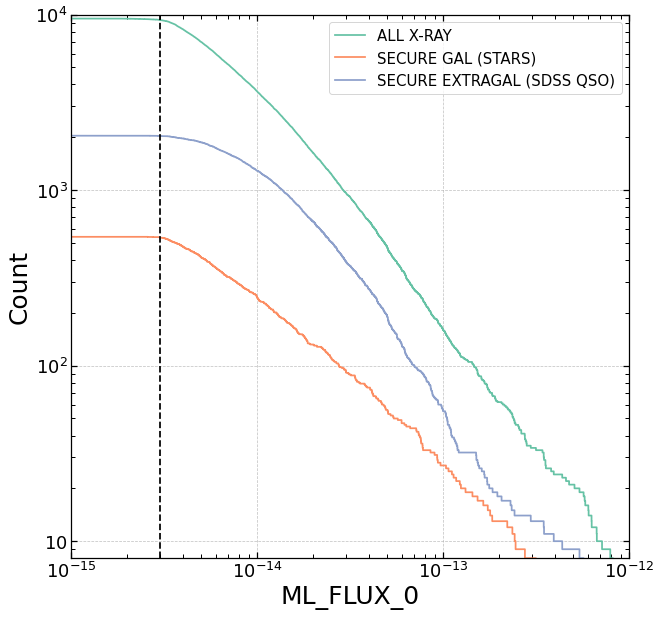

In [120]:
fig,  ax =  plt.subplots( figsize = (10,10))
sns.set_palette("Set2", color_codes=True)
sns.ecdfplot(desi_gais_sdss_classes.ML_FLUX_0, ax=ax, complementary=True, stat = 'count', label = 'ALL X-RAY')
sns.ecdfplot(desi_gais_sdss_classes.query("source_class=='secure_gal'").ML_FLUX_0, ax=ax, complementary=True, stat = 'count', label = 'SECURE GAL (STARS)')
sns.ecdfplot(desi_gais_sdss_classes.query("source_class=='secure_extragal'").ML_FLUX_0, ax=ax, complementary=True, stat = 'count', label = 'SECURE EXTRAGAL (SDSS QSO)')
ax.set(xscale="log", yscale="log")
ax.set(xlim=(1e-15, 1e-12), ylim = (8, 10000))
ax.axvline(3e-15, color='k', linestyle='--')
ax.legend()



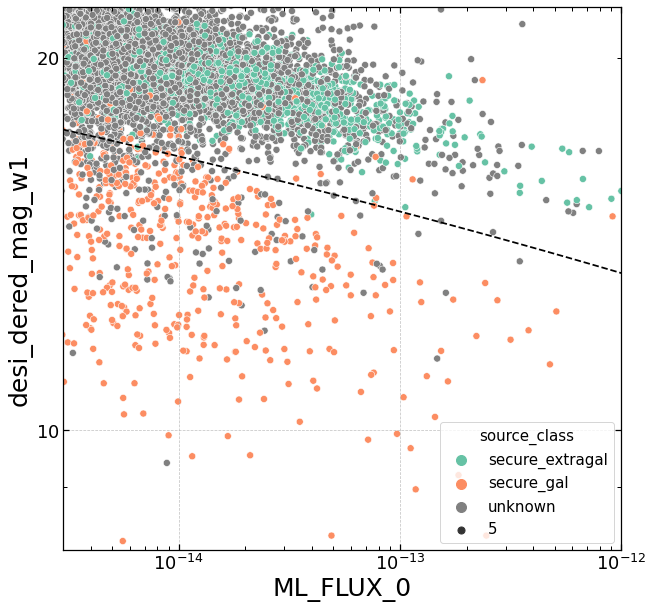

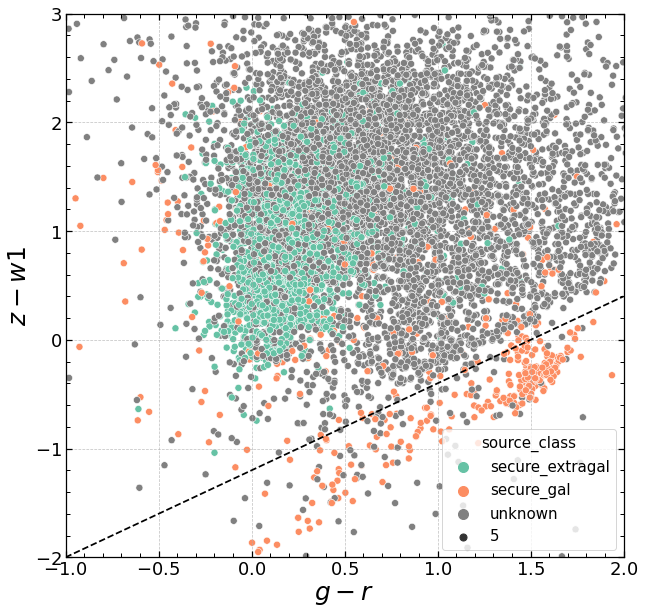

In [121]:
fig,  ax =  plt.subplots( figsize = (10,10))
sns.set_palette("Set2", color_codes=True)
sns.scatterplot(x='ML_FLUX_0', y='desi_dered_mag_w1', data=desi_gais_sdss_classes, ax = ax, **hue_args)
ax.set(xscale="log", yscale="log")
ax.set(xlim=(3e-15, 1e-12), ylim = (8, 22))

ax.plot(xrayflux:=np.logspace(-15,-10, 50), -6.101 - 1.625*np.log10(xrayflux), color='k', linestyle='--')

fig,  ax =  plt.subplots( figsize = (10,10))
col1 = desi_gais_sdss_classes['desi_dered_mag_g'] - desi_gais_sdss_classes['desi_dered_mag_r']
col2 = desi_gais_sdss_classes['desi_dered_mag_z'] - desi_gais_sdss_classes['desi_dered_mag_w1']
sns.scatterplot(x=col1, y=col2,  data=desi_gais_sdss_classes, ax = ax, **hue_args )
ax.set(xlim=(-1,2), ylim = (-2,3), xlabel='$g-r$', ylabel='$z-w1$')

ax.plot(gmr:=np.linspace(-1,2, 50), -1.2 + 0.8*gmr, color='k', linestyle='--')


# fig,  ax =  plt.subplots( figsize = (10,10))
# col1 = desi_gais_sdss_classes['desi_dered_mag_r'] - desi_gais_sdss_classes['desi_dered_mag_z']
# dered_flux_r = 10 ** (9 - desi_gais_sdss_classes['desi_dered_mag_r'] / 2.5)
# col2 = np.log10(desi_gais_sdss_classes['ML_FLUX_0']/dered_flux_r)
# sns.scatterplot(x=col1, y=col2,  data=desi_gais_sdss_classes, ax = ax, **hue_args )
# # ax.set(xlim=(-1,2), ylim = (-2,3), xlabel='$Fx/r$', ylabel='$r-z$')
# ax.set(xlabel='$Fx/r$', ylabel='$r-z$')

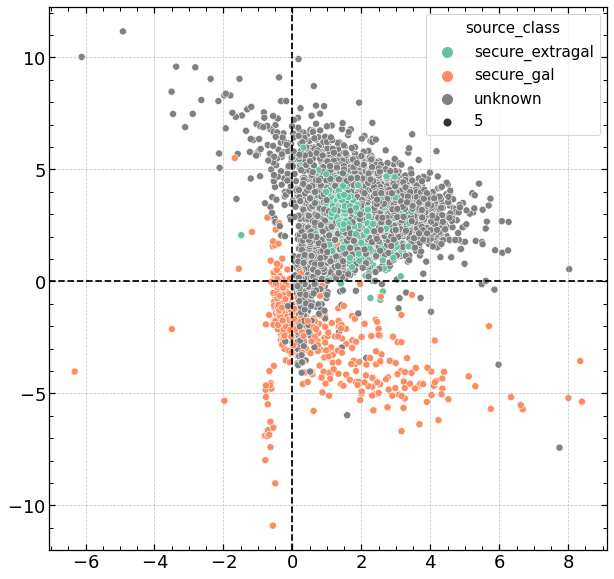

In [122]:
fig,  ax =  plt.subplots( figsize = (10,10))
col1 = desi_gais_sdss_classes['desi_dered_mag_z'] - desi_gais_sdss_classes['desi_dered_mag_w1'] + 1.2 -  0.8*(desi_gais_sdss_classes['desi_dered_mag_g']- desi_gais_sdss_classes['desi_dered_mag_r'])


col2 = desi_gais_sdss_classes['desi_dered_mag_w1'] + 1.625*np.log10(desi_gais_sdss_classes['ML_FLUX_0']) + 6.01


sns.scatterplot(x=col1, y=col2,  data=desi_gais_sdss_classes, ax = ax, **hue_args )
#ax.set(xlim=(-1,2), ylim = (-2,3), xlabel='$g-r$', ylabel='$z-w1$')

#ax.plot(gmr:=np.linspace(-1,2, 50), -1.2 + 0.8*gmr, color='k', linestyle='--')
ax.axhline(0, color='k', linestyle='--')
ax.axvline(0, color='k', linestyle='--')

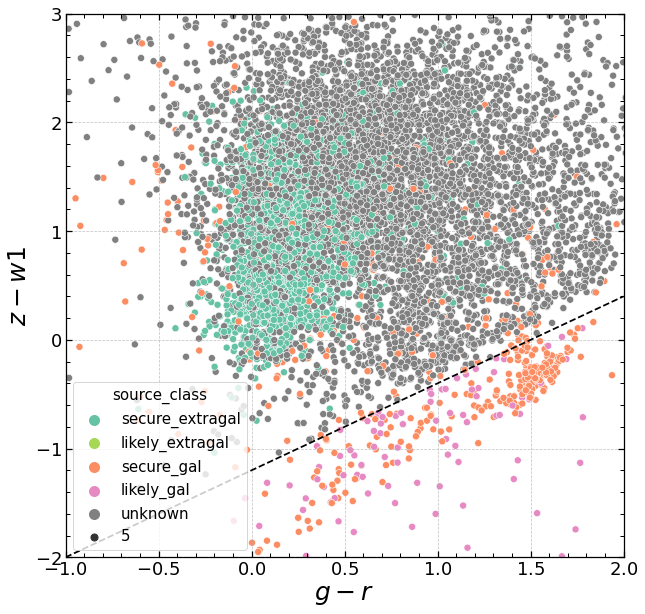

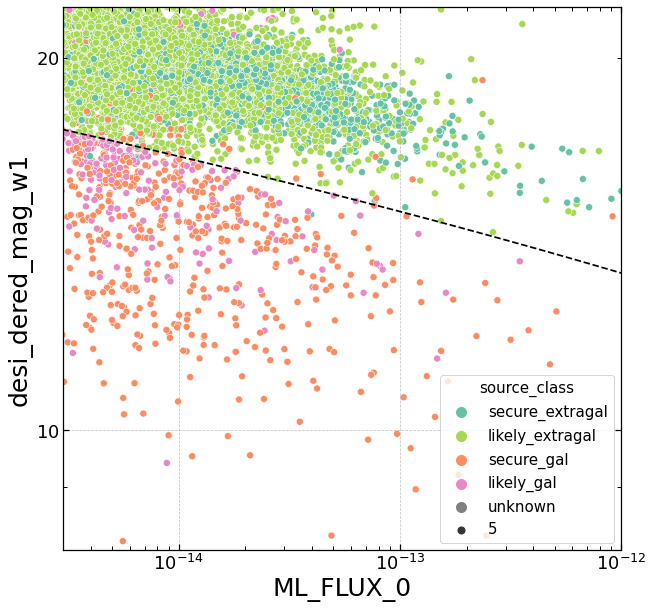

In [133]:
#reset likely classification if exsisting
desi_gais_sdss_classes.loc[desi_gais_sdss_classes.source_class.isin(['likely_gal', 'likely_extragal']), 'source_class'] = 'unknown'

# step 1: grzw1 classification:
gmr = desi_gais_sdss_classes['desi_dered_mag_g'] - desi_gais_sdss_classes['desi_dered_mag_r']
zmw1 = desi_gais_sdss_classes['desi_dered_mag_z'] - desi_gais_sdss_classes['desi_dered_mag_w1']
condition = (zmw1 < -1.2 + 0.8*gmr) 

desi_gais_sdss_classes.loc[condition * desi_gais_sdss_classes.source_class == 'unknown', 'source_class'] = 'likely_gal'

fig,  ax =  plt.subplots( figsize = (10,10))
sns.scatterplot(x=gmr, y=zmw1,  data=desi_gais_sdss_classes, ax = ax, **hue_args_classified )
ax.set(xlim=(-1,2), ylim = (-2,3), xlabel='$g-r$', ylabel='$z-w1$')
ax.plot(gmr:=np.linspace(-1,2, 50), -1.2 + 0.8*gmr, color='k', linestyle='--')


#step 2: FxW1 classification:
logFx = np.log10(desi_gais_sdss_classes['ML_FLUX_0'])
w1 = desi_gais_sdss_classes['desi_dered_mag_w1']

condition = (w1 > -1.625*logFx - 6.101)

desi_gais_sdss_classes.loc[condition* desi_gais_sdss_classes.source_class == 'unknown', 'source_class'] = 'likely_extragal'
desi_gais_sdss_classes.loc[~condition* desi_gais_sdss_classes.source_class == 'unknown', 'source_class'] = 'likely_gal'


fig,  ax =  plt.subplots( figsize = (10,10))
sns.set_palette("Set2", color_codes=True)
sns.scatterplot(x='ML_FLUX_0', y='desi_dered_mag_w1', data=desi_gais_sdss_classes, ax = ax, **hue_args_classified)
ax.set(xscale="log", yscale="log")
ax.set(xlim=(3e-15, 1e-12), ylim = (8, 22))
ax.plot(xrayflux:=np.logspace(-15,-10, 50), -6.101 - 1.625*np.log10(xrayflux), color='k', linestyle='--')



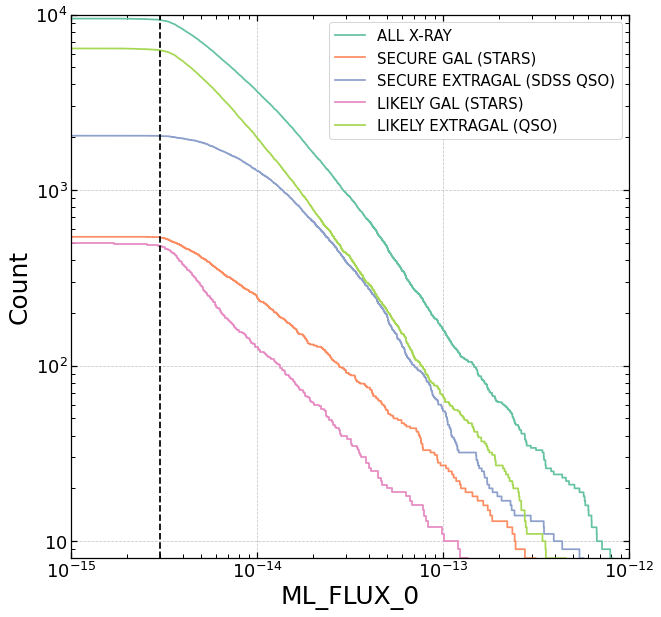

In [137]:
fig,  ax =  plt.subplots( figsize = (10,10))
sns.set_palette("Set2", color_codes=True)
sns.ecdfplot(desi_gais_sdss_classes.ML_FLUX_0, ax=ax, complementary=True, stat = 'count', label = 'ALL X-RAY')
sns.ecdfplot(desi_gais_sdss_classes.query("source_class=='secure_gal'").ML_FLUX_0, ax=ax, complementary=True, stat = 'count', label = 'SECURE GAL (STARS)')
sns.ecdfplot(desi_gais_sdss_classes.query("source_class=='secure_extragal'").ML_FLUX_0, ax=ax, complementary=True, stat = 'count', label = 'SECURE EXTRAGAL (SDSS QSO)')
sns.ecdfplot(desi_gais_sdss_classes.query("source_class=='likely_gal'").ML_FLUX_0, ax=ax, complementary=True, stat = 'count', label = 'LIKELY GAL (STARS)')
sns.ecdfplot(desi_gais_sdss_classes.query("source_class=='likely_extragal'").ML_FLUX_0, ax=ax, complementary=True, stat = 'count', label = 'LIKELY EXTRAGAL (QSO)')
ax.set(xscale="log", yscale="log")
ax.set(xlim=(1e-15, 1e-12), ylim = (8, 10000))
ax.axvline(3e-15, color='k', linestyle='--')
ax.legend()



In [142]:
import sys
sys.path.append('/Users/sdbykov/work/')
from forecast_clustering.scripts.luminosity_functions import XrayLuminosityFunction, ldde_hasinger_soft_cutoff

xlf_soft=XrayLuminosityFunction(xlf=ldde_hasinger_soft_cutoff)

Sarr = np.linspace(3e-15, 1e-12, 20)
Sarr, logNlogS = xlf_soft.logNlogS(Sarr)

In [147]:
logNlogS

array([2.84922379e+02, 4.53718824e+00, 1.50902069e+00, 7.81294507e-01,
       4.87532841e-01, 3.37393056e-01, 2.49384787e-01, 1.92936443e-01,
       1.54345533e-01, 1.26676186e-01, 1.06091351e-01, 9.03190170e-02,
       7.79395710e-02, 6.80264569e-02, 5.99526762e-02, 5.32808305e-02,
       4.76977529e-02, 4.29741299e-02, 3.89387236e-02, 3.54614366e-02])

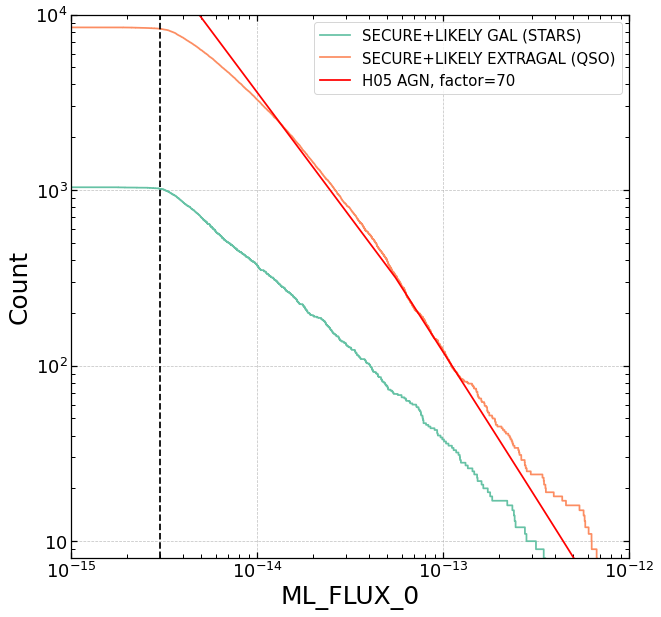

In [162]:
fig,  ax =  plt.subplots( figsize = (10,10))
sns.set_palette("Set2", color_codes=True)
#sns.ecdfplot(desi_gais_sdss_classes.ML_FLUX_0, ax=ax, complementary=True, stat = 'count', label = 'ALL X-RAY')
sns.ecdfplot(desi_gais_sdss_classes.query("source_class in ['secure_gal', 'likely_gal'] ").ML_FLUX_0, ax=ax, complementary=True, stat = 'count', label = 'SECURE+LIKELY GAL (STARS)')
sns.ecdfplot(desi_gais_sdss_classes.query("source_class in ['secure_extragal', 'likely_extragal'] ").ML_FLUX_0, ax=ax, complementary=True, stat = 'count', label = 'SECURE+LIKELY EXTRAGAL (QSO)')

ax.set(xscale="log", yscale="log")
ax.set(xlim=(1e-15, 1e-12), ylim = (8, 10000))
ax.axvline(3e-15, color='k', linestyle='--')
ax.legend()


factor = 70
plt.plot(Sarr, logNlogS*factor, color = 'r', label = f'H05 AGN, {factor=}')

plt.legend()

In [151]:
print(np.sum(desi_gais_sdss_classes.ML_FLUX_0>3e-15))
print(np.sum(desi_gais_sdss_classes.ML_FLUX_0>1e-14))

9309
3657


In [134]:
desi_gais_sdss_classes.source_class.value_counts()

likely_extragal    6418
secure_extragal    2043
secure_gal          542
likely_gal          497
Name: source_class, dtype: int64

# SDSS Quasars results

0.8613531161467861


/Users/sdbykov/work/forecast_clustering/scripts/luminosity_functions.py:526: RuntimeWarning: divide by zero encountered in log10
  a = np.max([np.log10(self._Lmin_(Slim, z)), logLmin])
/Users/sdbykov/work/forecast_clustering/scripts/luminosity_functions.py:527: RuntimeWarning: divide by zero encountered in log10
  b = np.min([np.log10(self._Lmin_(Smax, z)), logLmax])


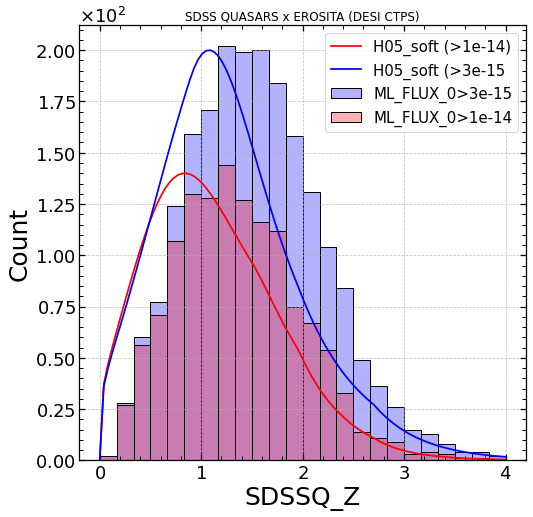

In [163]:

fig,  ax =  plt.subplots( figsize = (8,8))
bins = np.linspace(0,4,25)

sns.histplot(data = desi_sdss.query('ML_FLUX_0>3e-15'), x='SDSSQ_Z', bins=bins, color = 'b', alpha = 0.3,ax = ax, label = 'ML_FLUX_0>3e-15')
sns.histplot(data = desi_sdss.query('ML_FLUX_0>1e-14'), x='SDSSQ_Z', bins=bins, color = 'r', alpha = 0.3, ax = ax, label = 'ML_FLUX_0>1e-14')

ax.set_title('SDSS QUASARS x EROSITA (DESI CTPS)', fontsize = 12, loc = 'center')


import sys
sys.path.append('/Users/sdbykov/work/')
from forecast_clustering.scripts.luminosity_functions import XrayLuminosityFunction, ldde_hasinger_soft_cutoff, fdpl_aird15_soft, L210_to_L052_conv
coef = L210_to_L052_conv(gamma = 2)
print(coef)
#xlf_soft=XrayLuminosityFunction(xlf=lambda L,z: fdpl_aird15_soft(L/coef,z))
xlf_soft=XrayLuminosityFunction(xlf=ldde_hasinger_soft_cutoff)

#xlf_soft=XrayLuminosityFunction(xlf=ldde_hasinger_soft_cutoff)
zarr = np.linspace(0,4,100)
zarr, dndz_1e14 = xlf_soft.dNdz(Slim = 1e-14, zarr = zarr,)
zarr, dndz_3e15 = xlf_soft.dNdz(Slim = 3e-15, zarr = zarr,)

plt.plot(zarr, 1.4*dndz_1e14/np.max(dndz_1e14)*1e2, color = 'r', label = 'H05_soft (>1e-14)')
plt.plot(zarr, 2*dndz_3e15/np.max(dndz_3e15)*1e2, color = 'b', label = 'H05_soft (>3e-15')

#plt.plot(zarr, 1.4*dndz_1e14/np.max(dndz_1e14)*1e2, color = 'r', label = 'A15_soft (>1e-14)')
#plt.plot(zarr, 2*dndz_3e15/np.max(dndz_3e15)*1e2, color = 'b', label = 'A15_soft (>3e-15')
plt.legend()

<AxesSubplot:xlabel='RA_fin', ylabel='DEC_fin'>

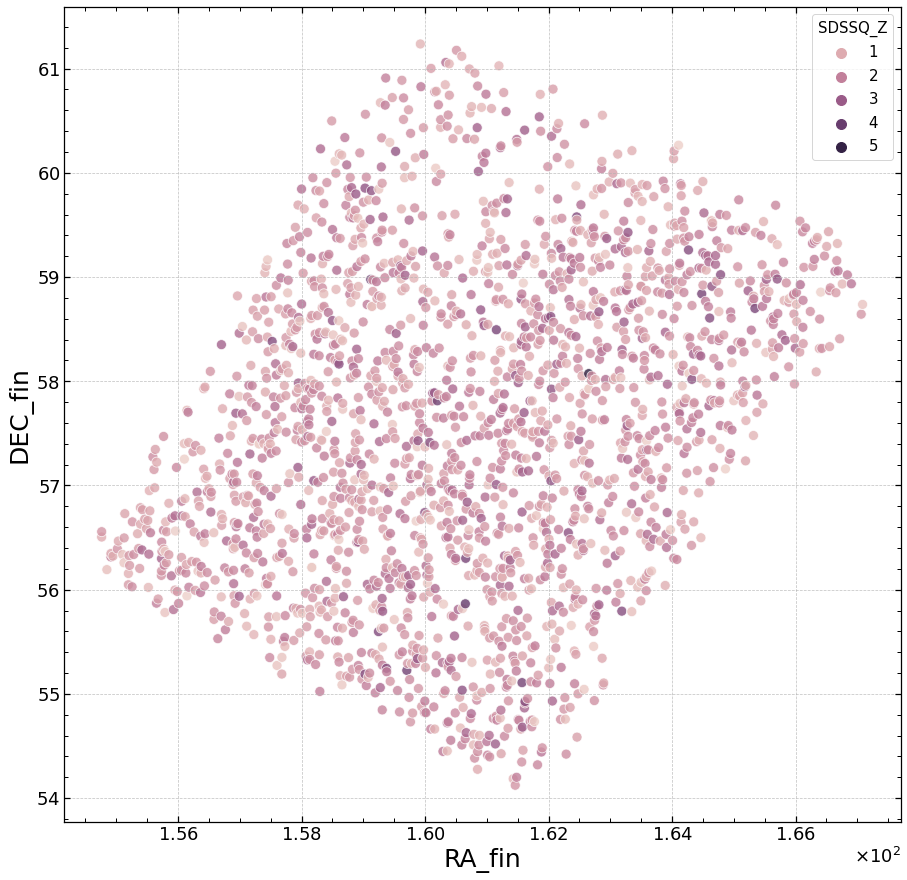

In [166]:
plt.figure(figsize=(15,15))

#sns.scatterplot(data = desi_cat, x='RA_fin', y='DEC_fin', color = 'k', alpha = 0.05)
sns.scatterplot(data = desi_gais_sdss, x='RA_fin', y='DEC_fin', color = 'b', alpha = 0.8, hue = 'SDSSQ_Z')
